In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp
import numpy as np
import math

# 1)
Give the periodic signal $x(t)$

![test](figs/mm11.1.png)

## 1.1) Find the Fourier Series $X[n]$, *hint* Do the integration over one period from -1 to 1.
We can see that it is contiuous in time, as we go from $-\infty$ to $\infty$, whereas the frequency is periodic in time.
As we can see that it is the same pattern we see again and again.

From MM11S07, then we can see we need to use the following formula.

$$
F(n) = \frac{\omega_0}{2\pi}
\int_{-\pi/\omega_0}^{\pi/\omega_0}
f(t) e^{-jn\omega_0 t} dt
$$

In [2]:
# use j to substitute with, as if we use 
# 1j (imaginary  unit), then it does not
# play as nice. You can simplify by hand
# after if it is needed
n, t, j = sp.symbols("n t j")


intExp = sp.exp(-t)*sp.exp(-j*n*sp.pi*t)
exp = (1/2) * sp.integrate(intExp, (t, -1, 1))
exp = exp.simplify()
display(exp)

Piecewise((0.5*(exp(2*pi*j*n + 2) - 1)*exp(-pi*j*n - 1)/(pi*j*n + 1), Ne(j, -1/(pi*n))), (1.0, True))

## 1.2) Find and plot $|X[n]|$ for $n \in [-30; 30]$ (NOT DONE! Need to figure out how to isolate value)

<StemContainer object of 3 artists>

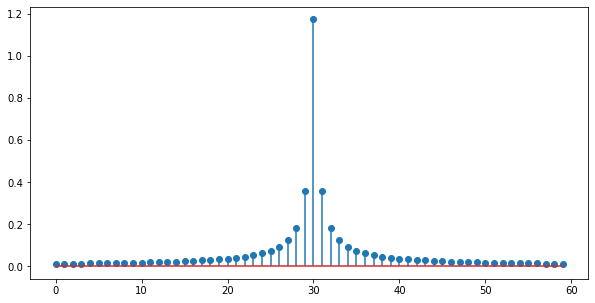

In [14]:
# I am not 100% sure, how Peter gets this formula, but it should be possible
# he basically isolates the imaginary part as much as possible, and we should
# be able to do that as well!
peterExpFirst = ((sp.exp(1)-(1/sp.exp(1)))*sp.cos(n*sp.pi))/(2*(1+n**2*sp.pi**2))
peterExp = sp.Abs(peterExpFirst) * sp.sqrt(1+(n*sp.pi)**2)

fy = lambda nVal: peterExp.subs({n: nVal}).evalf()
#x = np.linspace(-30, 30, 2*500)
x = np.arange(-30, 30)
y = [fy(i) for i in x]

fig, ax = plt.subplots(figsize=(10,5))
ax.stem(y, use_line_collection=True)

# 2) Problem 8.4 page. 713 (685)
Consider the sequence $x[n]$ given by $x[n] = a^n u[n]$.
Assume $|a| < 1$.
A periodic sequence $x[n]$ is constructed from $x[n]$ in the following way:

$$
\tilde{x}[n] = \sum_{r=-\infty}^{\infty} x[n+rN]
$$

## a) Determine the Fourier transform $X(e^{iw})$ of $x[n]$.
We know that the DTFT of of $e^{j\omega}$, is given as:

$$
X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] e^{-j\omega n}
$$

From this we get the following (keep in mind we have our unit step function):

$$
X(e^{j\omega})
= \sum_{n=-\infty}^{\infty} a^n u[n] e^{-j\omega n}
= \sum_{n=0}^{\infty} a^n e^{-j\omega n}
= \sum_{n=0}^{\infty} \left( ae^{-j\omega} \right)^n
= \frac{1}{1-ae^{-j\omega}} \; \; \text{for} \; |a| < 1
$$

Which gives us a geometric series (check notes).

## b) Determine the DFS coefficients $\tilde{X}[k]$ for the sequence $\tilde{x}[n]$.
From MM1.S17 we get the following:

$$
\tilde{X}[k] = \sum_{n=0}^{N-1} \tilde{x}[n]W_N^{kn} \; \; \text{where} \; \; W_N=e^{-j(2\pi/N)}
$$

Therefore we get the following (keep in mind, we can rearange our sums, as they are seen as constants when they no longer rely on the sum):

$$
\begin{align}
\tilde{X}[k] 
&= \sum_{n=0}^{N-1} \sum_{r=-\infty}^{\infty} x[n+rN] W_N^{kn}
= \sum_{n=0}^{N-1} \sum_{r=-\infty}^{\infty} a^{n+rN} u[n+rN] W_N^{kn}
= \sum_{n=0}^{N-1} \sum_{r=0}^{\infty} a^{n+rN} W_N^{kn} \\
&= \sum_{n=0}^{N-1} \sum_{r=0}^{\infty} a^{n} a^{rN} W_N^{kn}
= \sum_{n=0}^{N-1} a^{n}W_N^{kn} \sum_{r=0}^{\infty} a^{rN} 
= \sum_{n=0}^{N-1} \left( aW_N^{k} \right)^n \sum_{r=0}^{\infty} \left( a^{N} \right)^r 
= \sum_{n=0}^{N-1} \left( a e^{-j \frac{2\pi}{N}k} \right)^n \sum_{r=0}^{\infty} \left( a^{N} \right)^r \\
&= \frac{1 - \left( ae^{-j \frac{2\pi}{N}k} \right)^N }{1 - ae^{-j \frac{2\pi}{N}k}} \frac{1}{1 - a^{N}}
= \frac{1 - a^N e^{-j 2\pi k}}{1 - ae^{-j \frac{2\pi}{N}k}} \frac{1}{1 - a^{N}}
= \frac{1 - a^N }{1 - ae^{-j \frac{2\pi}{N}k}} \frac{1}{1 - a^{N}} \\
& (\text{because eulers function} \; \; e^{-j 2\pi k} = cos(x) + isin(x) = cos(-2\pi k) + i sin(-2\pi k) = 1) \\
& = \frac{1 - a^N }{1 - ae^{-j \frac{2\pi}{N}k}} \frac{1}{1 - a^{N}}
= \frac{\frac{1}{1 - a^{N}} -  \frac{a^N}{1 - a^{N}} }{1 - ae^{-j \frac{2\pi}{N}k}}
= \frac{\frac{1-a^N}{1 - a^{N}} }{1 - ae^{-j \frac{2\pi}{N}k}}
= \frac{1}{1 - ae^{-j \frac{2\pi}{N}k}} \; \; \text{for} \; \; |a| < 1
\end{align}
$$

Keep in mind, that for all our geometric series, we have that $|a| < 1$, but sadly it is not written, as it takes up too much space, but it should!
*REMEMBER IT!*

## c) How is $\tilde{X}[k]$ related to $X(e^{iw})$? 

$$
\begin{align}
X(e^{j\omega}) &= \frac{1}{1-ae^{-j\omega}} \; \; \text{for} \; |a| < 1 \\
\tilde{X}[k] &= \frac{1}{1 - ae^{-j \frac{2\pi}{N}k}} \; \; \text{for} \; \; |a| < 1 \\
\tilde{X}[k] &= \left. X(e^{j\omega}) \right|_{\omega=\frac{2 \pi}{N} k}
\end{align}
$$

So the Fourier Series coefficients are the Fourier Transformation (frequency response) sampled in frequencies $\omega_k = \frac{2 \pi}{N}k$.
This it taken directly from the solution example.

# Problem 8.5 page 713 question a+b (685)
Compute the DFT of each of the following finite-length sequences considered to be of length N (where N is even): 

## a) $x[n] = \delta[n]$
We have a unit step function, which means it has a value of 1 at 0, go to notes or MM5 to see this.

To get the $X[k]$, we use the formula from MM11S28.

$$
\begin{align}
X[k] &= \sum_{n=0}^{N-1} x[n] W_N^{kn} \\
X[k] &= \sum_{n=0}^{N-1} \delta[n] W_N^{kn} 
= \sum_{n=0}^{N-1} \delta[n] e^{-j \frac{2 \pi}{N}kn}
= 1 \cdot e^{-j \frac{2 \pi}{N}k \cdot 0} + 0 \cdot e^{-j \frac{2 \pi}{N}k \cdot 1} + 0 \cdot e^{-j \frac{2 \pi}{N}k \cdot 2} + \dots
= 1
\end{align}
$$

(we did not have to insert the actual value of $W_N^{kn}$)

## b) $x[n] = \delta[n-n_0]$,    $0 \leq n_0 \leq N - 1$
Same function as before

$$
\begin{align}
X[k] &= \sum_{n=0}^{N-1} x[n] W_N^{kn} \\
X[k] &= \sum_{n=0}^{N-1} \delta[n - n_0] W_N^{kn} 
\end{align}
$$

From here we should note, that for it not to be zero, we want $n=n_0$, as we want $\delta[n-n_0]$ to give us one.
This means, that we can rewrite it as follows.

$$
\begin{align}
X[k] &= \sum_{n=0}^{N-1} x[n] W_N^{kn} \\
X[k] &= \sum_{n=0}^{N-1} \delta[n_0 - n_0] W_N^{kn_0} \\
X[k] &= W_N^{kn_0} 
\end{align}
$$

I hope that it makes sense!

# Problem 8.7 714 (686) (NOT DONE!)
Consider the finite-length sequence $x[n]$ in Figure P8.7. Let $X(z)$ be the z-transform of $x[n]$.
If we sample $X(z)$ at $z = e^{j(2\pi/4)k}$, k = 0,1,2,3, we obtain 

$$
X_1[k] = \left. X(z) \right|_{z=e^{j(2\pi/4}k}, \; \; k=0,1.2.3
$$

Sketch the sequence $x_1[n]$ obtained as the inverse DFT of $X_1[k]$.

![p8.7](figs/mm11.4.png)

We know that (signalprocessing for comtek, mm3.s12)

$$
X(z)
= \sum_{n=-\infty}^\infty x[n] z^{-n} 
= \sum_{n=0}^{5} z^{-n} 
$$

We get this from the Figure P8.7, where it goes from 0 to 5, with a pulse of 1 each time, therefore we just have our $z^{-n}$.
We can now insert our value for $z$, keep in mind our definition of $W_N=e^{-j(2\pi/N)}$.

$$
X[k]
= \left. \sum_{n=0}^{5} z^{-n} \right|_{z=e^{j(2\pi/4)k}}
= \sum_{n=0}^{5} e^{-j(2\pi/p)kn}
= \sum_{n=0}^{5} W_4^{kn}
$$

This gives is a 4-point DFT, keep in mind that we could see from our expression that $N=4$, thereby we have the period $N=4$, and our k is defined as $0 \leq k \leq 4$.

In [15]:
x = sp.symbols("x")

exp1 = 1/(1-x)
exp2 = (1-x*1)
exp = exp1 * exp2
display(exp)

1